#### **Collaborative Filtering Recommender Model**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import sparse
from surprise import Reader
from surprise import Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import KFold
from surprise import KNNBasic
from surprise import accuracy

## Data Pre-Processing

In [186]:
yelp_ratings = pd.read_csv('/Users/hetvipatel/Documents/GRAD SCHOOL/DATA 606/yelp_reviews_food_categories.csv', 
                           usecols = ['user_id', 'business_id', 'stars_y', 'date'])

In [187]:
yelp_ratings.dtypes

business_id     object
user_id         object
stars_y        float64
date            object
dtype: object

In [188]:
yelp_ratings.isna().sum()

business_id    0
user_id        2
stars_y        2
date           3
dtype: int64

In [189]:
yelp_ratings = yelp_ratings.dropna()
yelp_ratings.isna().sum()

business_id    0
user_id        0
stars_y        0
date           0
dtype: int64

In [190]:
yelp_ratings['stars_y'] = yelp_ratings['stars_y'].astype('int64')
yelp_ratings['user_id'] = yelp_ratings['user_id'].astype('str')
yelp_ratings['business_id'] = yelp_ratings['business_id'].astype('str')

In [191]:
yelp_ratings.dtypes

business_id    object
user_id        object
stars_y         int64
date           object
dtype: object

## Collab Filtering With SVD #1 (work in progress)

In [200]:
yelp_ratings

,business_id,user_id,stars_y,date
0,2AwhlMOMsYXJvskZKKG2GA,jBzITjfkC7M99oN6a5HErQ,4,2017-09-18 17:29:03
1,2AwhlMOMsYXJvskZKKG2GA,R9AkporqiO758oEz_g9kxQ,3,2018-07-04 01:02:30
2,2AwhlMOMsYXJvskZKKG2GA,-Z97B_kIy1-w3nifW1PQZg,5,2016-10-13 02:00:28
3,2AwhlMOMsYXJvskZKKG2GA,9m9mkjkyo4HGFUWgugewHA,5,2016-07-12 15:05:25
4,2AwhlMOMsYXJvskZKKG2GA,KE2en6iTCiCtqVS9hq50sg,5,2018-07-03 23:28:02
...,...,...,...,...
3584005,2O2K6SXPWv56amqxCECd4w,eWz12w7dzYlfrGnhTQ82Fg,5,2019-07-14 14:25:35
3584006,2O2K6SXPWv56amqxCECd4w,lDyhGApbGZ0_BoeJzRQq7g,5,2021-06-25 23:22:26
3584007,2O2K6SXPWv56amqxCECd4w,-TTJ75--0NEAjvFCOV7rBg,5,2016-12-09 21:38:05
3584008,2O2K6SXPWv56amqxCECd4w,8yFNNU7UmQcfzmcTvzTlOA,1,2020-02-19 22:59:06


In [194]:
reader = Reader()

yelp_rating_data = Dataset.load_from_df(yelp_ratings[['user_id', 
                                                      'business_id',
                                                      'stars_y']], 
                                                      reader)

In [195]:
train_df, test_df = train_test_split(yelp_rating_data, 
                                     test_size=.2)

#80-20 split

In [196]:
# 1.24 RSME -- not completely accurate

svd = SVD()

cross_validate(svd, yelp_rating_data, measures=['RMSE', 'MAE'], cv=5)

{'test_rmse': array([1.24407796, 1.24431662, 1.24327169, 1.24184461, 1.24325441]),
 'test_mae': array([0.99078718, 0.99055997, 0.98961275, 0.98867901, 0.9899433 ]),
 'fit_time': (247.75840187072754,
  259.9934890270233,
  241.4818778038025,
  234.46741724014282,
  254.79769682884216),
 'test_time': (18.17107605934143,
  10.219706296920776,
  6.18735408782959,
  14.499445915222168,
  16.45994782447815)}

In [197]:
svd_model_trained = svd.fit(train_df)

In [204]:
# user_id, business_id that the user might rate, rating given by the user based on what other's have rated
# we can see that this user gave 4.0 for this restaurant


svd_model_trained.predict('9m9mkjkyo4HGFUWgugewHA', 
                          '2O2K6SXPWv56amqxCECd4w', 
                          5.0)

Prediction(uid='9m9mkjkyo4HGFUWgugewHA', iid='2O2K6SXPWv56amqxCECd4w', r_ui=5.0, est=4.704478704922286, details={'was_impossible': False})

## Collab Filtering with SVD #2 (work in progress)

In [206]:
yelp_ratings = pd.read_csv('/Users/hetvipatel/Documents/GRAD SCHOOL/DATA 606/yelp_reviews_food_categories.csv')                        

In [207]:
yelp_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584010 entries, 0 to 3584009
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars_x       float64
 9   review_count  float64
 10  is_open       float64
 11  attributes    object 
 12  categories    object 
 13  review_id     object 
 14  user_id       object 
 15  stars_y       float64
 16  useful        float64
 17  funny         float64
 18  cool          float64
 19  text          object 
 20  date          object 
dtypes: float64(9), object(12)
memory usage: 574.2+ MB


In [208]:
yelp_ratings.isna().sum()

business_id         0
name                1
address         10783
city                2
state               2
postal_code        38
latitude            2
longitude           2
stars_x             2
review_count        2
is_open             2
attributes       6192
categories          2
review_id           2
user_id             2
stars_y             2
useful              2
funny               2
cool                2
text                2
date                3
dtype: int64

In [209]:
yelp_ratings = yelp_ratings.dropna()
yelp_ratings.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
attributes      0
categories      0
review_id       0
user_id         0
stars_y         0
useful          0
funny           0
cool            0
text            0
date            0
dtype: int64

#### SVD and KNN

In [210]:
yelp_kNN = yelp_ratings[['user_id', 'business_id', 'stars_y']]

In [211]:
reader = Reader()

data = Dataset.load_from_df(yelp_kNN, reader)

In [212]:
train, test = train_test_split(data, test_size=0.20, random_state=46)

In [213]:
algo_svd = SVD()

prediction_mf = algo_svd.fit(train).test(test)
prediction_mf[:5]

[Prediction(uid='duRjOU7ubkjflrFGffr5Rg', iid='ouqfnrUwbfsVMIPV4u1U2w', r_ui=3.0, est=2.7380578047405737, details={'was_impossible': False}),
 Prediction(uid='FVCA50C8hAZpwaAKQegcZA', iid='CQgupIpIbkyiVLUEcMIRCA', r_ui=5.0, est=4.297675493583616, details={'was_impossible': False}),
 Prediction(uid='xvXmyeBUvBBUZUpagEBxRQ', iid='MIjXkp8I_DWiCsC6lUeGdw', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='IFM9VzljyIE-z8WNs0lMwg', iid='ZyoQIM7cVOekqWYfwZ1sNg', r_ui=2.0, est=3.753526264052625, details={'was_impossible': False}),
 Prediction(uid='M1fk_IYOyZBKIw6ov8Q9hg', iid='6Bf5KwuT9iZlFrUlcP7RHg', r_ui=4.0, est=4.7075609098550535, details={'was_impossible': False})]

######### crashes

sim_options = {'name': 'pearson_baseline','shrinkage': 0}
algo = KNNBasic(sim_options=sim_options)
algo_knn = KNNBasic(k=75, sim_options=sim_options)
prediction_knn = algo_knn.fit(train).test(test)


prediction_knn[:5]

In [3]:
accuracy.mae(prediction_mf)
accuracy.fcp(prediction_mf)
accuracy.rmse(prediction_mf)

NameError: ignored

## Collab Filtering: User-Based (k-NN Collaborative Filtering)

In [ ]:
reader = Reader()

yelp_ratings = pd.read_csv('/Users/hetvipatel/Documents/GRAD SCHOOL/DATA 606/yelp_reviews_food_categories.csv', 
                           usecols = ['user_id', 'business_id', 'stars_y', 'date'])

In [136]:
yelp_ratings.head()

,business_id,user_id,stars_y,date
0,2AwhlMOMsYXJvskZKKG2GA,jBzITjfkC7M99oN6a5HErQ,4.0,2017-09-18 17:29:03
1,2AwhlMOMsYXJvskZKKG2GA,R9AkporqiO758oEz_g9kxQ,3.0,2018-07-04 01:02:30
2,2AwhlMOMsYXJvskZKKG2GA,-Z97B_kIy1-w3nifW1PQZg,5.0,2016-10-13 02:00:28
3,2AwhlMOMsYXJvskZKKG2GA,9m9mkjkyo4HGFUWgugewHA,5.0,2016-07-12 15:05:25
4,2AwhlMOMsYXJvskZKKG2GA,KE2en6iTCiCtqVS9hq50sg,5.0,2018-07-03 23:28:02


In [137]:
yelp_ratings.duplicated(['user_id', 'business_id', 'stars_y', 'date']).sum()

7

In [138]:
split_value = int(len(yelp_ratings) * 0.80) # 80-20 split
train_data = yelp_ratings[:split_value]
test_data = yelp_ratings[split_value:]

<ipython-input-139-0df561a0f965>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


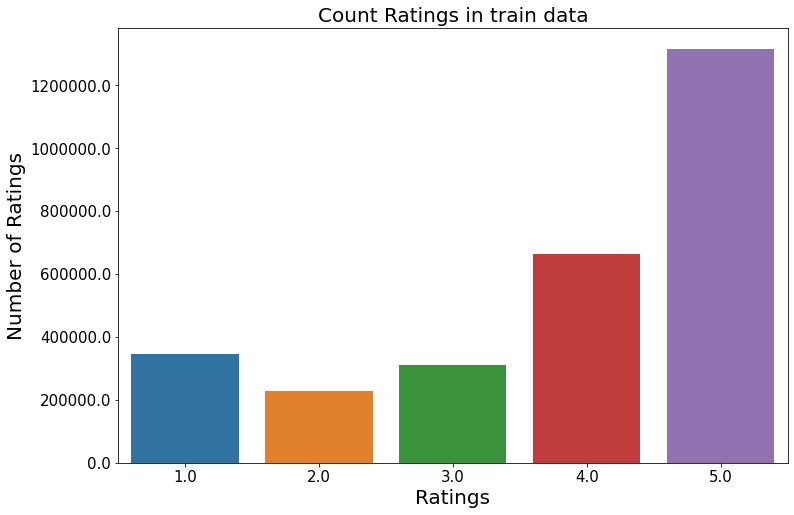

In [139]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="stars_y", data=train_data)

ax.set_yticklabels([num for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [140]:
number_rated_reviews_per_user = train_data.groupby(by = "user_id")["stars_y"].count().sort_values(ascending = False)
number_rated_reviews_per_user.head()

user_id
_BcWyKQL16ndpBdggh2kNA    1020
-G7Zkl1wIWBBmD0KRy_sCw     838
fr1Hz2acAb3OaL3l6DyKNg     684
Xw7ZjaGfr0WNVt6s_5KZfA     652
1HM81n6n4iPIFU5d2Lokhw     649
Name: stars_y, dtype: int64

In [141]:
number_rating_per_biz = train_data.groupby(by = "business_id")["stars_y"].count().sort_values(ascending = False)
number_rating_per_biz.head()

user_id
_BcWyKQL16ndpBdggh2kNA    1020
-G7Zkl1wIWBBmD0KRy_sCw     838
fr1Hz2acAb3OaL3l6DyKNg     684
Xw7ZjaGfr0WNVt6s_5KZfA     652
1HM81n6n4iPIFU5d2Lokhw     649
Name: stars_y, dtype: int64

##### User-Item Sparse Matrix

In [142]:
def get_user_item_sparse_matrix(df):
    sparse_data = sparse.csr_matrix((df.stars_y, (df.user_id, df.business_id)))
    return sparse_data

In [143]:
train_sparse_data = get_user_item_sparse_matrix(train_data)

TypeError: ignored

In [103]:
def get_average_rating(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_ratings = sparse_matrix.sum(axis = ax).A1  
    no_of_ratings = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_ratings = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(rows if is_user else cols) if no_of_ratings[i] != 0}
    return average_ratings

In [ ]:
average_rating_user = get_average_rating(train_sparse_data, True)

## Scrap Work:

In [36]:
import pandas as pd

from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import KFold

In [11]:
categories = yelp_biz_review['categories'].dropna()
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

biz_categories = to_1D(categories.str.split(","))